In [1]:
import xarray as xr
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
import intake, intake_esm
import os
import sys
from pathlib import Path
from glob import glob
import itertools
import time
import seaborn as sns
import math
import scipy.stats as st
import requests

import warnings
warnings.filterwarnings('ignore')

%run functions.ipynb

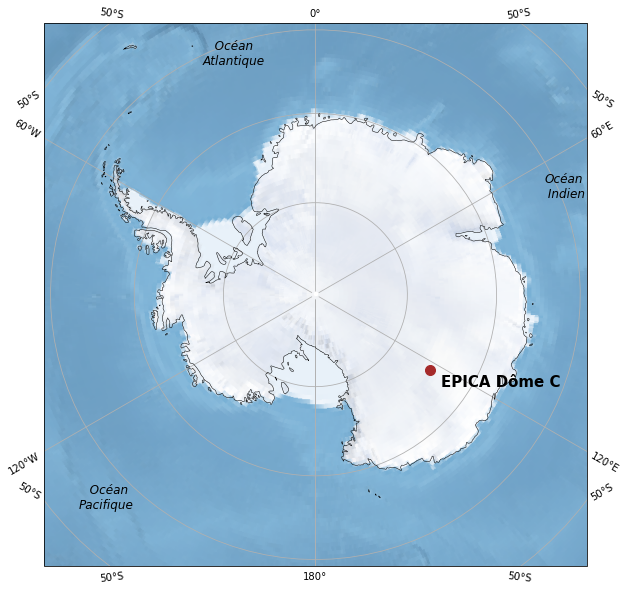

In [4]:
fig = plt.figure(figsize=(15, 10))
lonlatproj = ccrs.PlateCarree()
my_projn = ccrs.Orthographic(central_longitude=0,central_latitude=-90)

ax1 = plt.subplot(1, 1, 1, projection=my_projn)

# set `lowlat` as lower limits of latitude to plot some points
# these points will determine the plot extents of the map
lowlat = -65 + 2.8   # and get 60
lons, lats = [-180,-90,0,90], [lowlat,lowlat,lowlat,lowlat]
# plot invisible points to get map extents
ax1.scatter(lons, lats, s=0, color='r', transform=lonlatproj)
#ax1.stock_img()  #uncomment to get it plotted
ax1.coastlines(lw=0.5, zorder=2)
ax1.gridlines(lw=4, ec='black', draw_labels=True)
ax1.stock_img()
ax1.scatter(123.2, -75, 
            s = 100,
            color = 'brown',
            transform = ccrs.PlateCarree())
ax1.text(126, -73, 
         'EPICA Dôme C',
         fontsize = 15,
         weight = 'bold',
         transform = ccrs.PlateCarree())
ax1.text(-132, -53, 
         '   Océan\nPacifique',
         fontsize = 12,
         fontstyle = 'italic',
         transform = ccrs.PlateCarree())
ax1.text(-26, -61, 
         '   Océan\nAtlantique',
         fontsize = 12,
         fontstyle = 'italic',
         transform = ccrs.PlateCarree())
ax1.text(67, -62, 
         'Océan\n Indien',
         fontsize = 12,
         fontstyle = 'italic',
         transform = ccrs.PlateCarree())
plt.savefig('/home/bchaigneau/Stage_LSCE/plot/map_antarctica.jpeg', dpi = 300)